In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("Skyserver.csv")

In [9]:
data.head()

objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  54922      491  
1  51615      541  
2  52023      513  
3  54922      510  
4  54922      512

In [10]:
data.info() #see info about the dataset and if it contains null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [11]:
data.nunique().to_frame().transpose() #see if there is any duplicte enteries

objid     ra    dec     u     g     r     i     z  run  rerun  camcol  \
0      1  10000  10000  9730  9817  9852  9890  9896   23      1       6   

   field  specobjid  class  redshift  plate  mjd  fiberid  
0    703       6349      3      9637    487  355      892

In [12]:
occurrences = data['class'].value_counts().to_frame().rename(index=str, columns={'class': 'Occurrences'})
occurrences

Occurrences
GALAXY         4998
STAR           4152
QSO             850

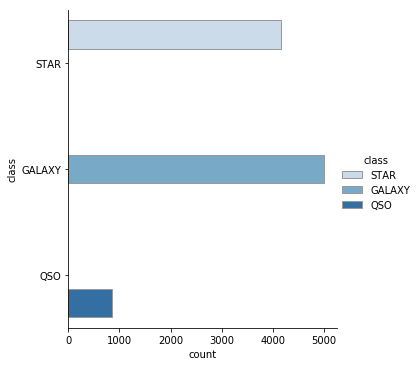

In [13]:
sns.catplot(y = "class", hue = "class", kind = "count", palette = "Blues", edgecolor= ".6", data = data);

In [15]:
featuredata = data.drop(['class','objid', 'fiberid', 'specobjid', 'rerun'], axis=1) #drop class column, unique and constant columns

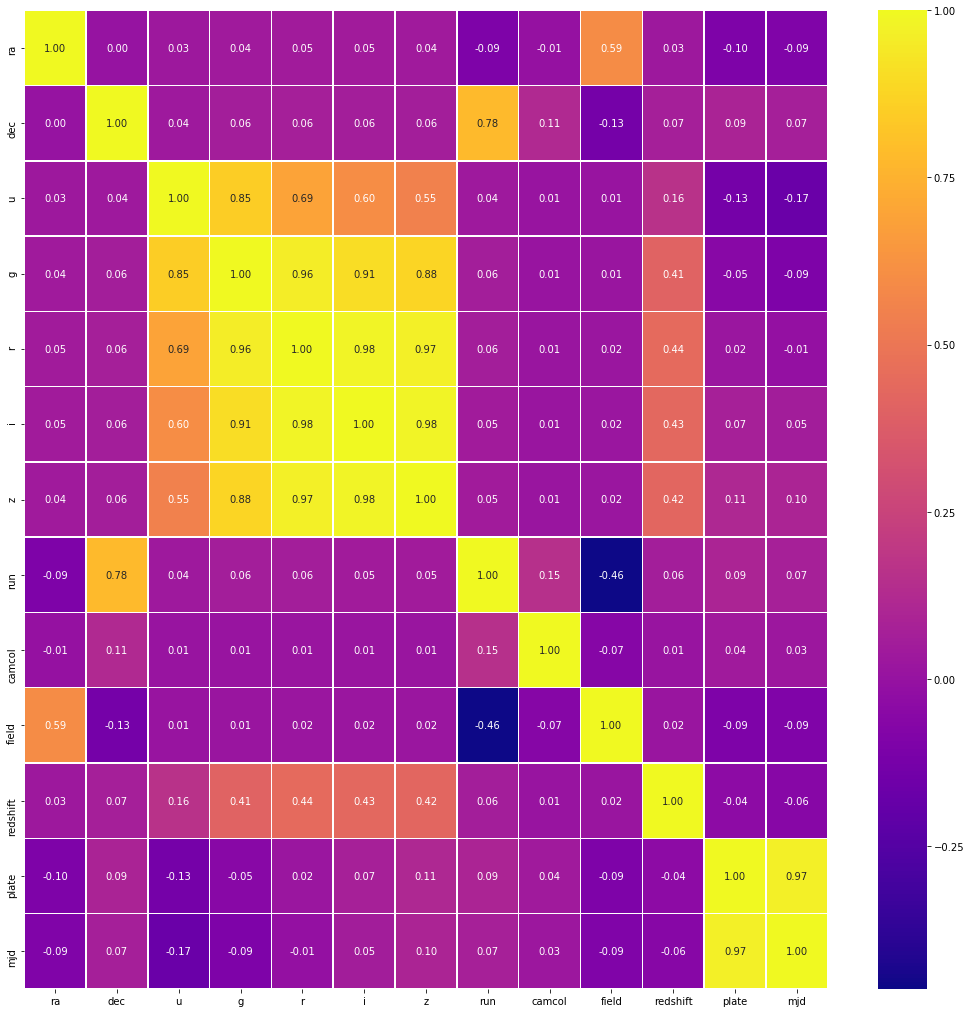

In [16]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(featuredata.corr(), annot=True,linewidths=.5, fmt= '.2f',ax=ax,cmap="plasma")
plt.show()

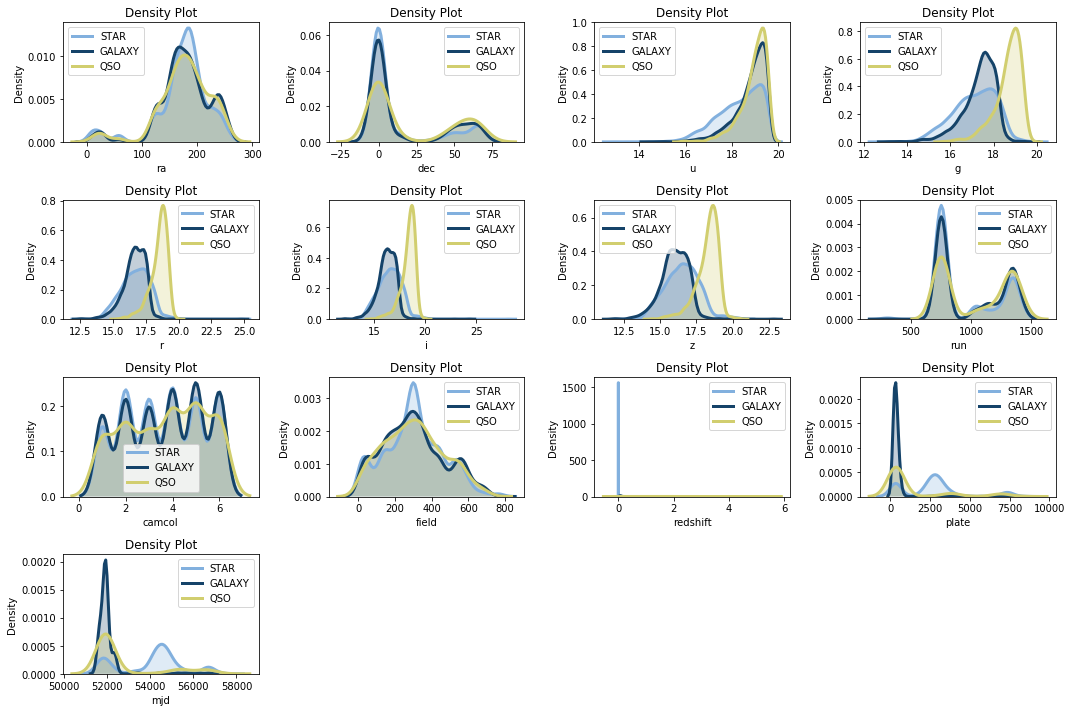

In [17]:
featurecols = list(featuredata)
astrObjs = data['class'].unique()
colours = ['#82b0de', '#154369', '#d1ce6f']
plt.figure(figsize=(15,10))
for i in range(len(featurecols)):
    plt.subplot(4, 4, i+1)
    for j in range(len(astrObjs)):
        sns.distplot(data[data['class']==astrObjs[j]][featurecols[i]], hist = False, kde = True, color = colours[j], kde_kws = {'shade': True, 'linewidth': 3}, label = astrObjs[j])
    plt.legend()
    plt.title('Density Plot')
    plt.xlabel(featurecols[i])
    plt.ylabel('Density')
plt.tight_layout()

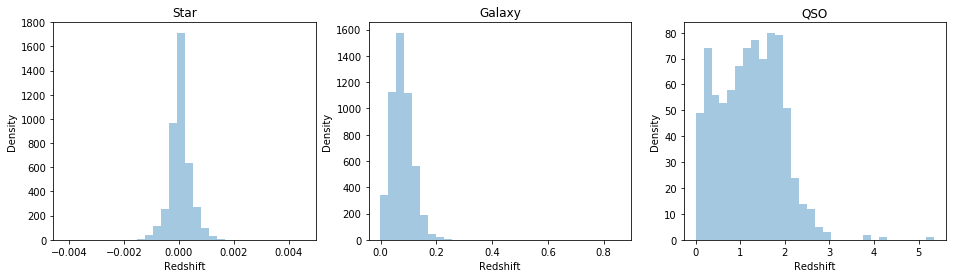

In [4]:
#view redshifts of each class
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.distplot(data[data['class']=='STAR'].redshift, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax.set(xlabel='Redshift', ylabel='Density')
ax = sns.distplot(data[data['class']=='GALAXY'].redshift, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax.set(xlabel='Redshift', ylabel='Density')
ax = sns.distplot(data[data['class']=='QSO'].redshift, bins = 30, ax = axes[2], kde = False)
ax.set(xlabel='Redshift', ylabel='Density')
ax = ax.set_title('QSO')

In [19]:
#Redshift means for the three classes

mgalaxy = np.mean(data[data['class']=='GALAXY'].redshift)
mstar = np.mean(data[data['class']=='STAR'].redshift)
mqso = np.mean(data[data['class']=='QSO'].redshift)

print("Redshfit mean of Galaxies: {:.6f}".format(mgalaxy))
print("Redshfit mean of Stars: {:.6f}".format(mstar))
print("Redshfit mean of Quasars: {:.6f}".format(mqso))

Redshfit mean of Galaxies: 0.080325
Redshfit mean of Stars: 0.000043
Redshfit mean of Quasars: 1.218366


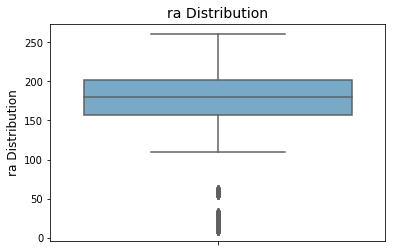

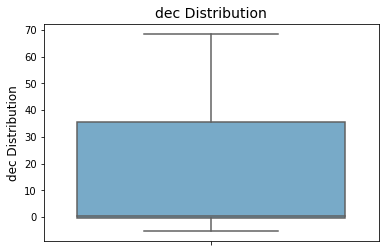

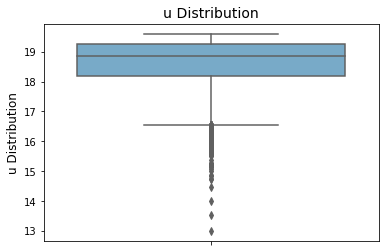

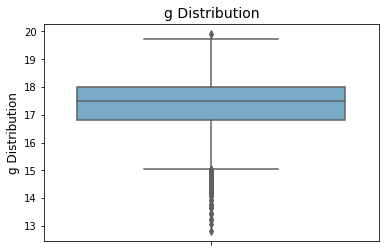

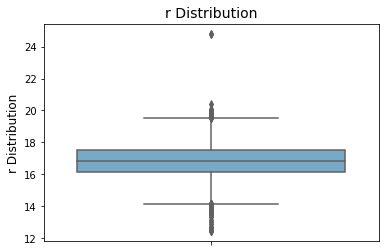

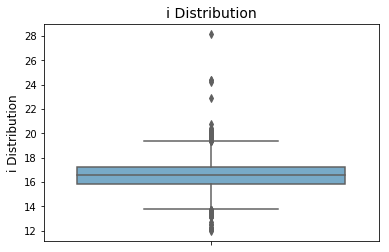

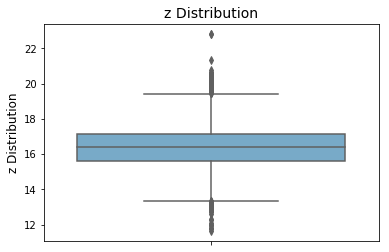

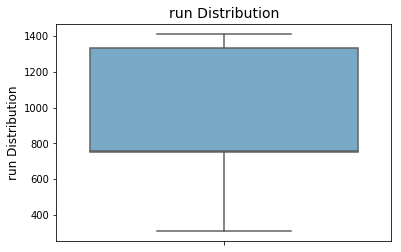

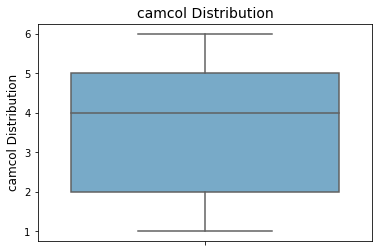

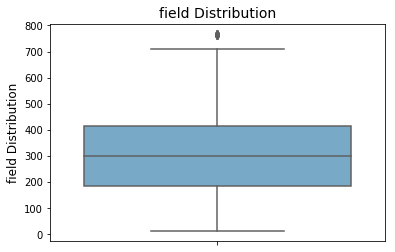

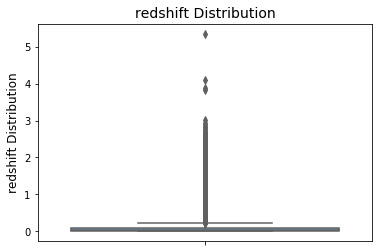

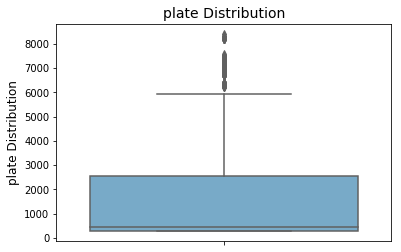

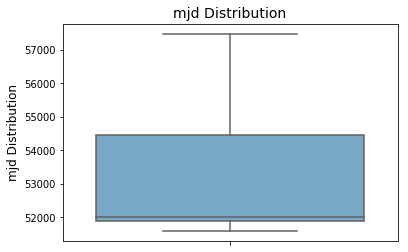

In [3]:
#outliers
dc = data[['ra','dec','u','g','r','i','z','run','camcol','field','redshift','plate','mjd']]

for i in dc.columns:
    sns.boxplot(y = i, data = data,  palette = "Blues", hue = "class")
    plt.ylabel(i+' Distribution', fontsize=12)
    plt.title(i+" Distribution", fontsize=14)
    plt.xticks(rotation='vertical')
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


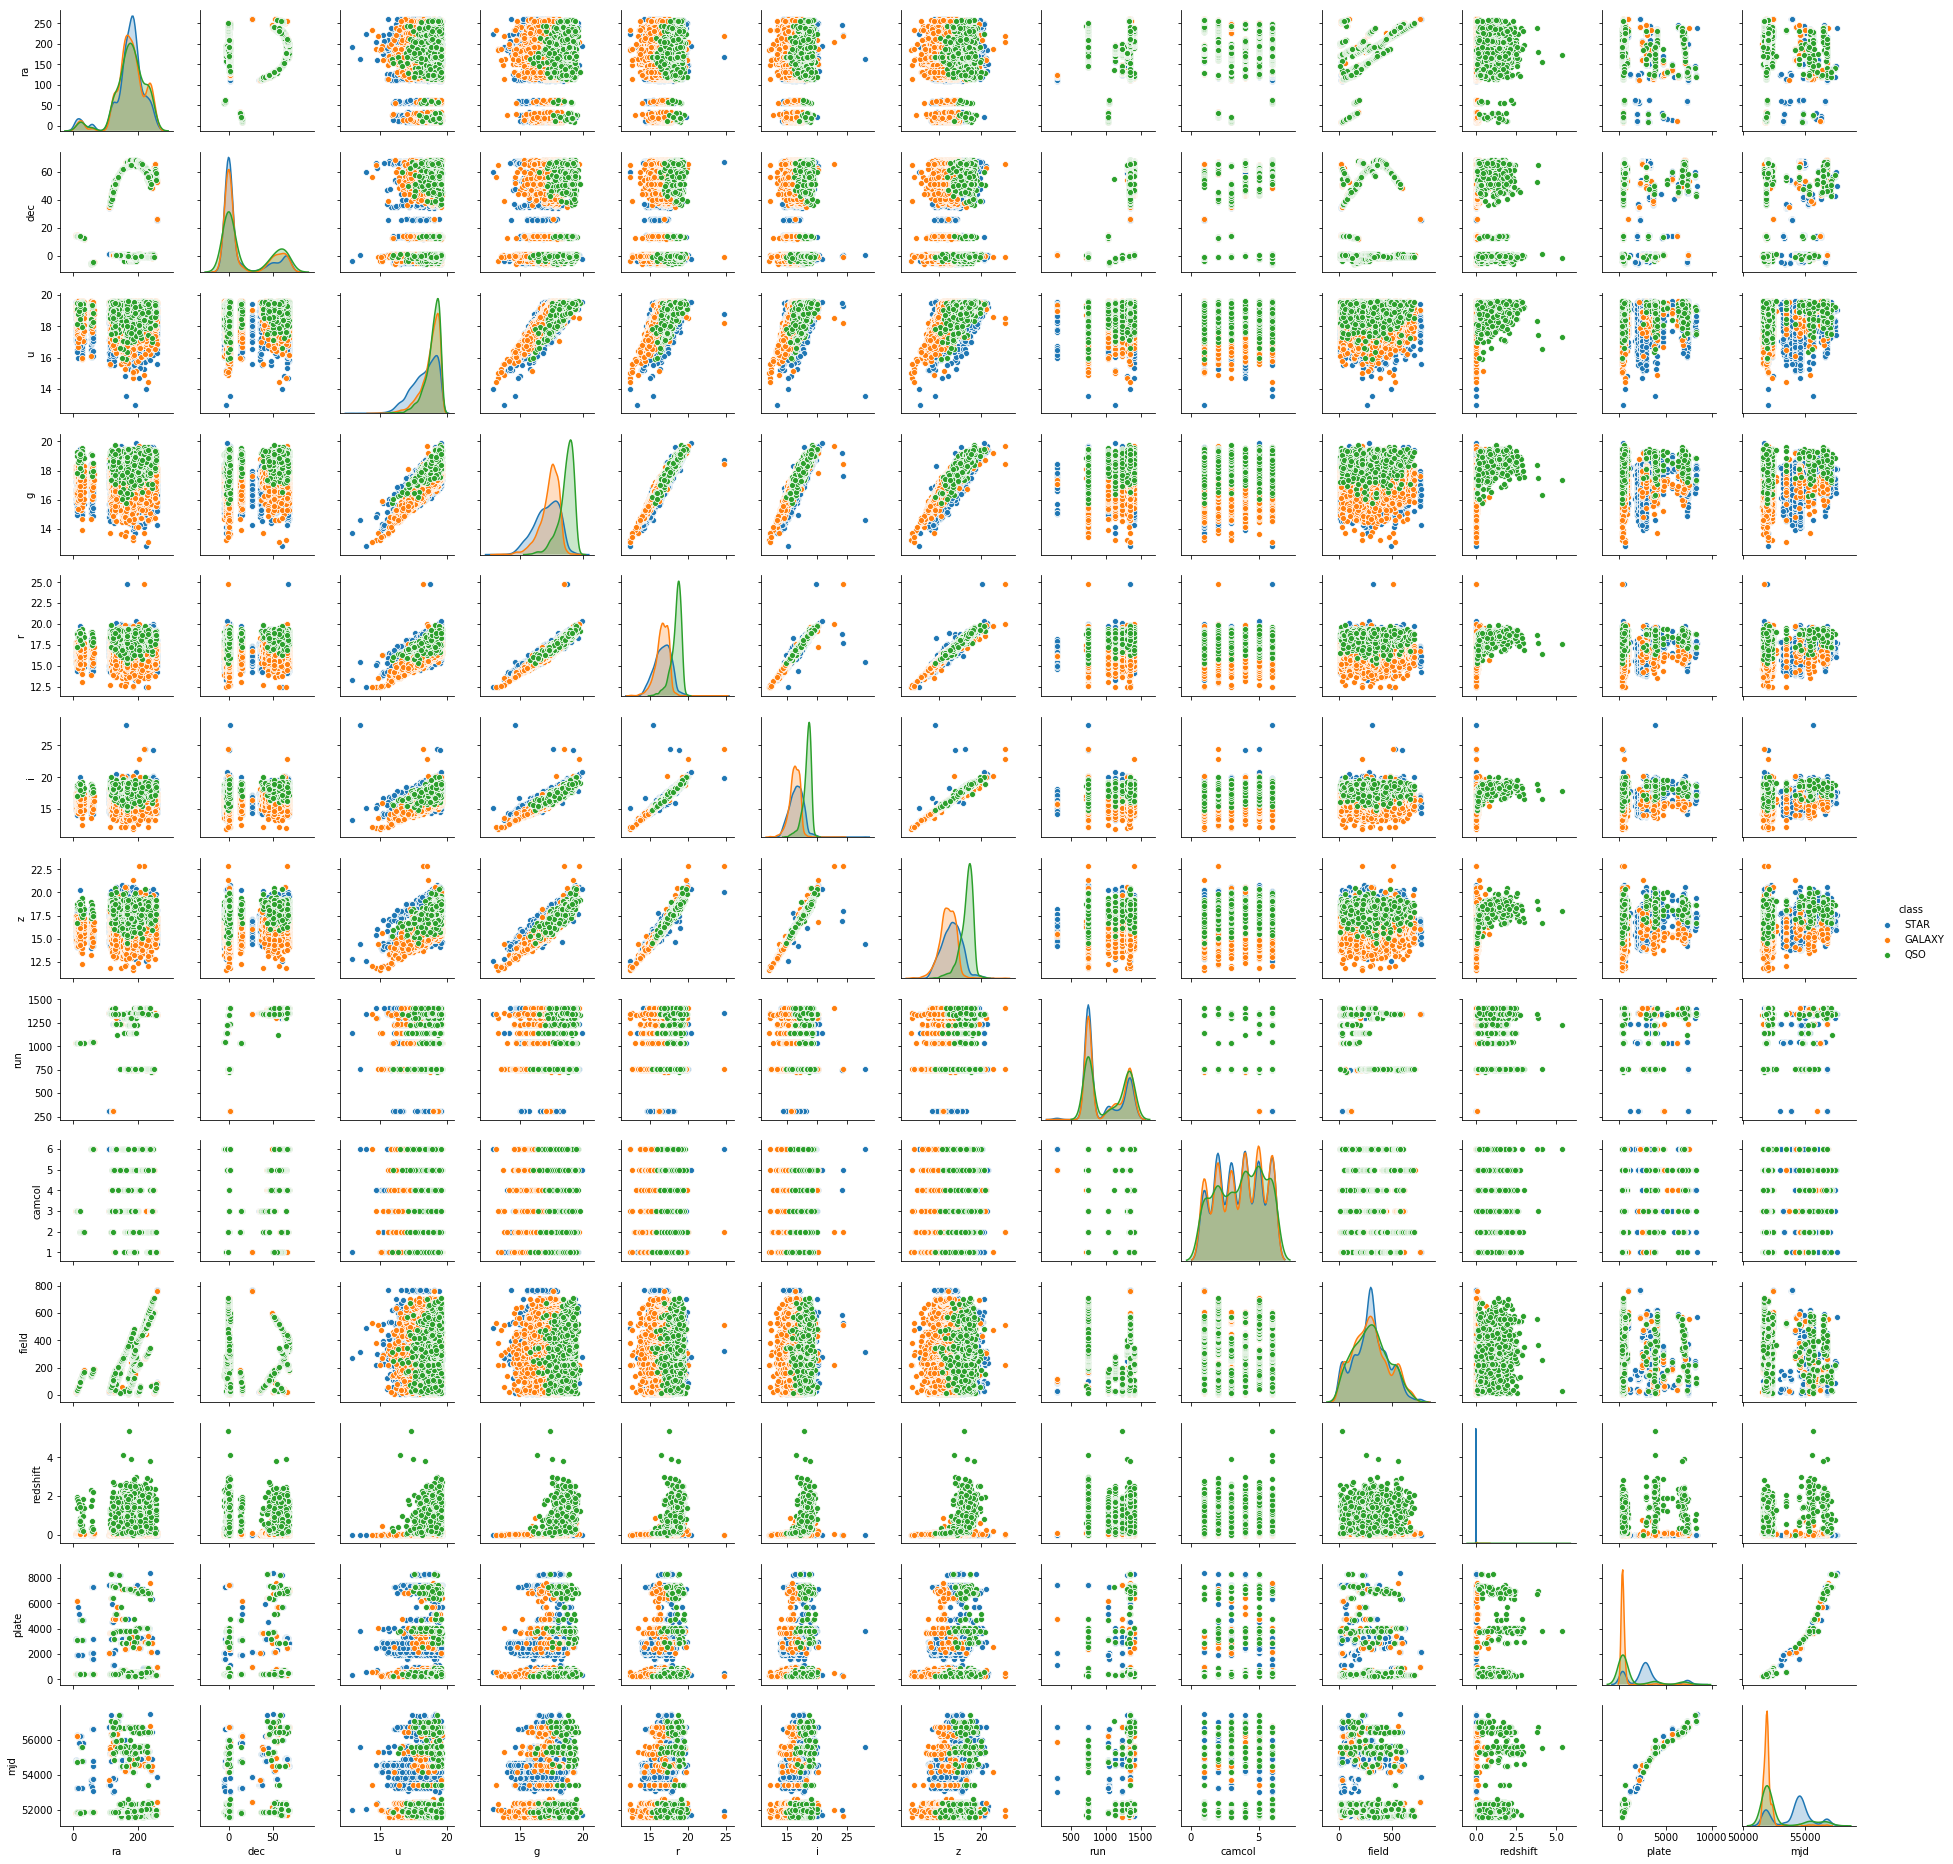

In [4]:
#correlation plot
featuredata2 = data.drop(['objid', 'fiberid', 'specobjid', 'rerun'], axis=1)
sns.pairplot(featuredata2, hue = "class", diag_kind="kde", size = 2);

In [7]:
cdata = data.drop(['objid', 'fiberid', 'specobjid', 'rerun'], axis = 1) #cdata: data with class column, without ID cols 
cdata.head()

ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

   run  camcol  field   class  redshift  plate    mjd  
0  752       4    267    STAR -0.000009   3306  54922  
1  752       4    267    STAR -0.000055    323  51615  
2  752       4    268  GALAXY  0.123111    287  52023  
3  752       4    269    STAR -0.000111   3306  54922  
4  752       4    269    STAR  0.000590   3306  54922

In [8]:
#Data Normalization using min max scaler
from sklearn.preprocessing import MinMaxScaler

data = data.drop(['class','objid', 'fiberid', 'specobjid', 'rerun'], axis=1) #drop class column, unique and constant columns

scaler = MinMaxScaler()
ndata = scaler.fit_transform(data) #ndata: normalized data
ndata = pd.DataFrame(data = ndata,  columns = ['ra','dec','u','g','r','i','z','run','camcol','field','redshift','plate','mjd'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


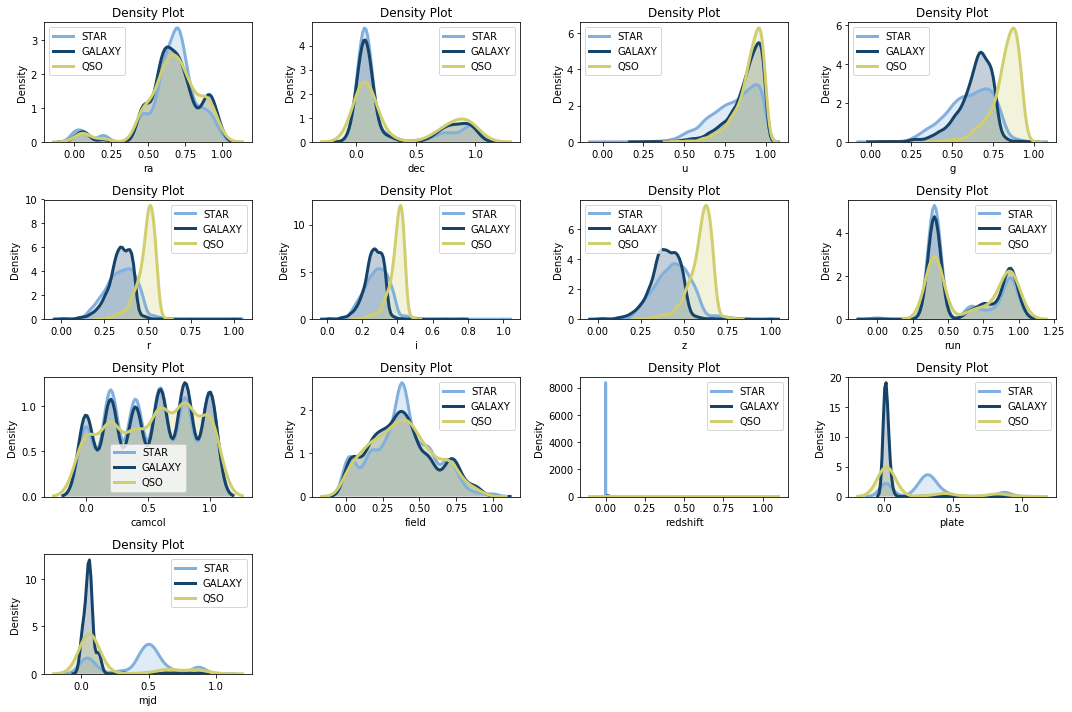

In [22]:
#visualize normalized data
import matplotlib.pyplot as plt
%matplotlib inline

featurecols = list(ndata)
astrObjs = cdata['class'].unique()
colours = ['#82b0de', '#154369', '#d1ce6f']
plt.figure(figsize=(15,10))
for i in range(len(featurecols)):
    plt.subplot(4, 4, i+1)
    for j in range(len(astrObjs)):
        sns.distplot(ndata[cdata['class']==astrObjs[j]][featurecols[i]], hist = False, kde = True, color = colours[j], kde_kws = {'shade': True, 'linewidth': 3}, label = astrObjs[j])
    plt.legend()
    plt.title('Density Plot')
    plt.xlabel(featurecols[i])
    plt.ylabel('Density')
plt.tight_layout()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ndata, cdata['class'], test_size = 0.33)

In [10]:
#SVM classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf1 = SVC(random_state = 42)

param1 = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

grid1 = GridSearchCV(clf1, param1, cv = 5)

grid_fit1 = grid1.fit(X_train, y_train)

best_clf1 = grid_fit1.best_estimator_

print(grid_fit1.best_estimator_)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)


In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

predictions1 = (clf1.fit(X_train, y_train)).predict(X_test)
best_predictions1 = best_clf1.predict(X_test)

print("SVM Predictions without using GridSearchCV:")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, predictions1)))
print("Classification Report:")
print(classification_report(y_test, predictions1))

svm_acc = accuracy_score(y_test, best_predictions1)
print("SVM Predictions using GridSearchCV: ")
print("Accuracy: {:.4f}".format(svm_acc))
print("Classification Report:")
print(classification_report(y_test, best_predictions1))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Predictions without using GridSearchCV:
Accuracy: 0.8491
Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.78      0.97      0.86      1608
         QSO       1.00      0.83      0.90       260
        STAR       0.95      0.72      0.82      1432

   micro avg       0.85      0.85      0.85      3300
   macro avg       0.91      0.84      0.86      3300
weighted avg       0.87      0.85      0.85      3300

SVM Predictions using GridSearchCV: 
Accuracy: 0.9809
Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.99      0.97      0.98      1608
         QSO       0.97      0.96      0.96       260
        STAR       0.97      0.99      0.98      1432

   micro avg       0.98      0.98      0.98      3300
   macro avg       0.98      0.97      0.98      3300
weighted avg       0.98      0.98      0.98      3300



Text(43.25, 0.5, 'True')

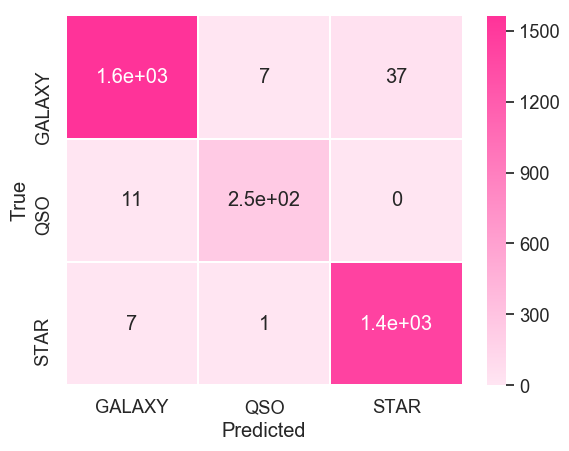

In [12]:
sortedlabels1 = best_clf1.classes_
cm = confusion_matrix(y_test, best_predictions1, sortedlabels1)
cm = pd.DataFrame(cm, index=sortedlabels1, columns=sortedlabels1)
sns.set(font_scale=1.2)
sns.heatmap(cm, linewidths=0.5, cmap=sns.light_palette((1, 0.2, 0.6),n_colors=10000), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [13]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 

clf2 = RandomForestClassifier(random_state = 42)

param2 = {'min_samples_split' : [2,4,8,15], 'bootstrap' : [True, False], 'min_samples_leaf' : [1,2,3,5]}

grid2 = GridSearchCV(clf2, param2, cv = 5)

grid_fit2 = grid2.fit(X_train, y_train)

best_clf2 = grid_fit2.best_estimator_

print(grid_fit2.best_estimator_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


In [14]:
predictions2 = (clf2.fit(X_train, y_train)).predict(X_test)
best_predictions2 = best_clf2.predict(X_test)

print("RF Predictions without using GridSearchCV:")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, predictions2)))
print("Classification Report:")
print(classification_report(y_test, predictions2))

RF_acc = accuracy_score(y_test, best_predictions2)
print("RF Predictions using GridSearchCV: ")
print("Accuracy: {:.4f}".format(RF_acc))
print("Classification Report:")
print(classification_report(y_test, best_predictions2))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF Predictions without using GridSearchCV:
Accuracy: 0.9894
Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99      1608
         QSO       0.97      0.94      0.95       260
        STAR       0.99      1.00      1.00      1432

   micro avg       0.99      0.99      0.99      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.99      0.99      0.99      3300

RF Predictions using GridSearchCV: 
Accuracy: 0.9876
Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99      1608
         QSO       0.97      0.93      0.95       260
        STAR       0.99      1.00      0.99      1432

   micro avg       0.99      0.99      0.99      3300
   macro avg       0.98      0.97      0.98      3300
weighted avg       0.99      0.99      0.99      3300



Text(43.25, 0.5, 'True')

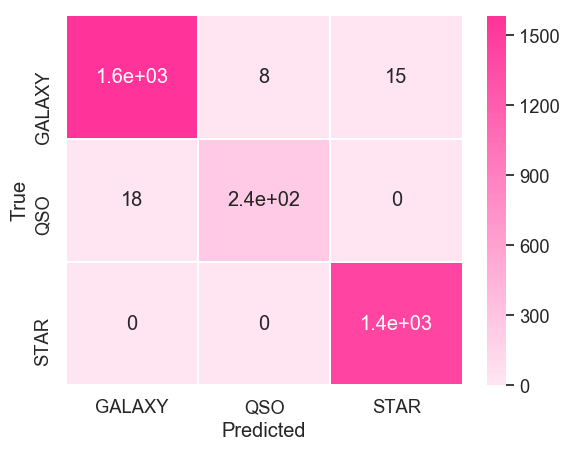

In [15]:
sortedlabels2 = best_clf2.classes_
cm2 = confusion_matrix(y_test, best_predictions2, sortedlabels2)
cm2 = pd.DataFrame(cm2, index=sortedlabels2, columns=sortedlabels2)
sns.set(font_scale=1.2)
sns.heatmap(cm2, linewidths=0.5, cmap=sns.light_palette((1, 0.2, 0.6),n_colors=10000), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [16]:
#MLP classifier
from sklearn.neural_network import MLPClassifier

clf3 = MLPClassifier()

param3 = {"activation": ["tanh", "logistic", "relu"]}

grid3 = GridSearchCV(clf3, param3, cv = 5)

grid_fit3 = grid3.fit(X_train, y_train)

best_clf3 = grid_fit3.best_estimator_

print(grid_fit3.best_estimator_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: Conve

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [17]:
predictions3 = (clf3.fit(X_train, y_train)).predict(X_test)
best_predictions3 = best_clf3.predict(X_test)

print("MLP Predictions without using GridSearchCV:")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, predictions3)))
print("Classification Report:")
print(classification_report(y_test, predictions3))

RF_acc = accuracy_score(y_test, best_predictions3)
print("MLP Predictions using GridSearchCV: ")
print("Accuracy: {:.4f}".format(RF_acc))
print("Classification Report:")
print(classification_report(y_test, best_predictions3))

MLP Predictions without using GridSearchCV:
Accuracy: 0.9752
Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.98      0.97      0.97      1608
         QSO       0.98      0.93      0.95       260
        STAR       0.97      0.99      0.98      1432

   micro avg       0.98      0.98      0.98      3300
   macro avg       0.98      0.96      0.97      3300
weighted avg       0.98      0.98      0.98      3300

MLP Predictions using GridSearchCV: 
Accuracy: 0.9800
Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98      1608
         QSO       0.98      0.92      0.95       260
        STAR       0.98      1.00      0.99      1432

   micro avg       0.98      0.98      0.98      3300
   macro avg       0.98      0.96      0.97      3300
weighted avg       0.98      0.98      0.98      3300



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(43.25, 0.5, 'True')

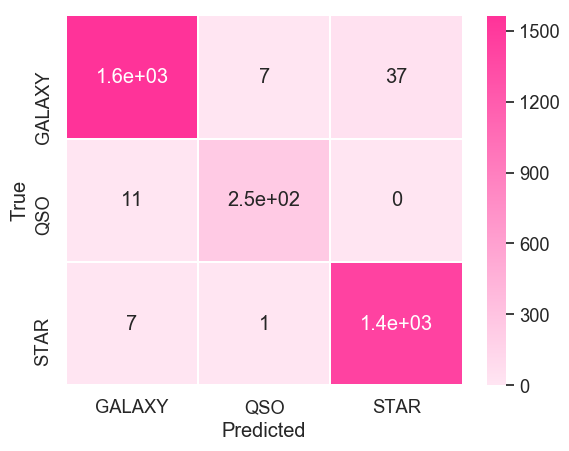

In [18]:
sortedlabels3 = best_clf3.classes_
cm3 = confusion_matrix(y_test, best_predictions1, sortedlabels3)
cm3 = pd.DataFrame(cm3, index=sortedlabels3, columns=sortedlabels3)
sns.set(font_scale=1.2)
sns.heatmap(cm3, linewidths=0.5, cmap=sns.light_palette((1, 0.2, 0.6),n_colors=10000), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

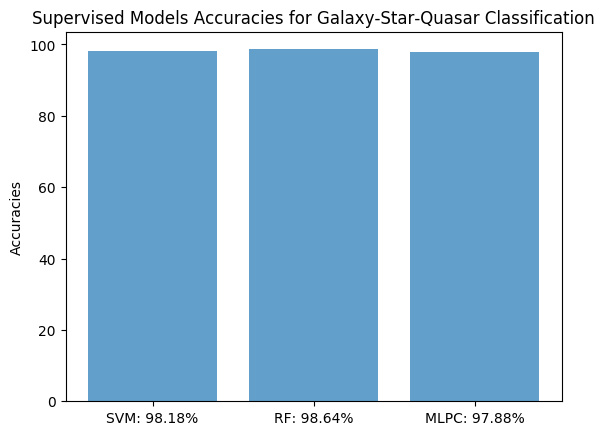

In [6]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('SVM: 98.18%', 'RF: 98.64%', 'MLPC: 97.88%')

y_pos = np.arange(len(objects))

Accuracies = [98.18000 ,98.64000, 97.88000]
 
plt.bar(y_pos, Accuracies, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracies')
plt.title('Supervised Models Accuracies for Galaxy-Star-Quasar Classification')
 
plt.show()

In [25]:
#K means clustering

cdata.rename({"class":"CLASS"}, axis= 1, inplace = True)
cdata.CLASS[cdata["CLASS"] == "STAR"] = 0.0
cdata.CLASS[cdata["CLASS"] == "GALAXY"] = 1.0
cdata.CLASS[cdata["CLASS"] == "QSO"] = 2.0
cdata['CLASS'] = cdata['CLASS'].astype('int')
y = cdata["CLASS"]
cdata.drop("CLASS", axis = 1, inplace = True)
X = cdata
cdata.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

   run  camcol  field  redshift  plate    mjd  
0  752       4    267 -0.000009   3306  54922  
1  752       4    267 -0.000055    323  51615  
2  752       4    268  0.123111    287  52023  
3  752       4    269 -0.000111   3306  54922  
4  752       4    269  0.000590   3306  54922

In [26]:
from sklearn.cluster import KMeans

clu1 = KMeans(n_clusters = 3)
clu1.fit(X)

Prediction1 = clu1.predict(X)

In [27]:
from sklearn.metrics import silhouette_score

silhouette_score(X, Prediction1)

0.8174301505857815

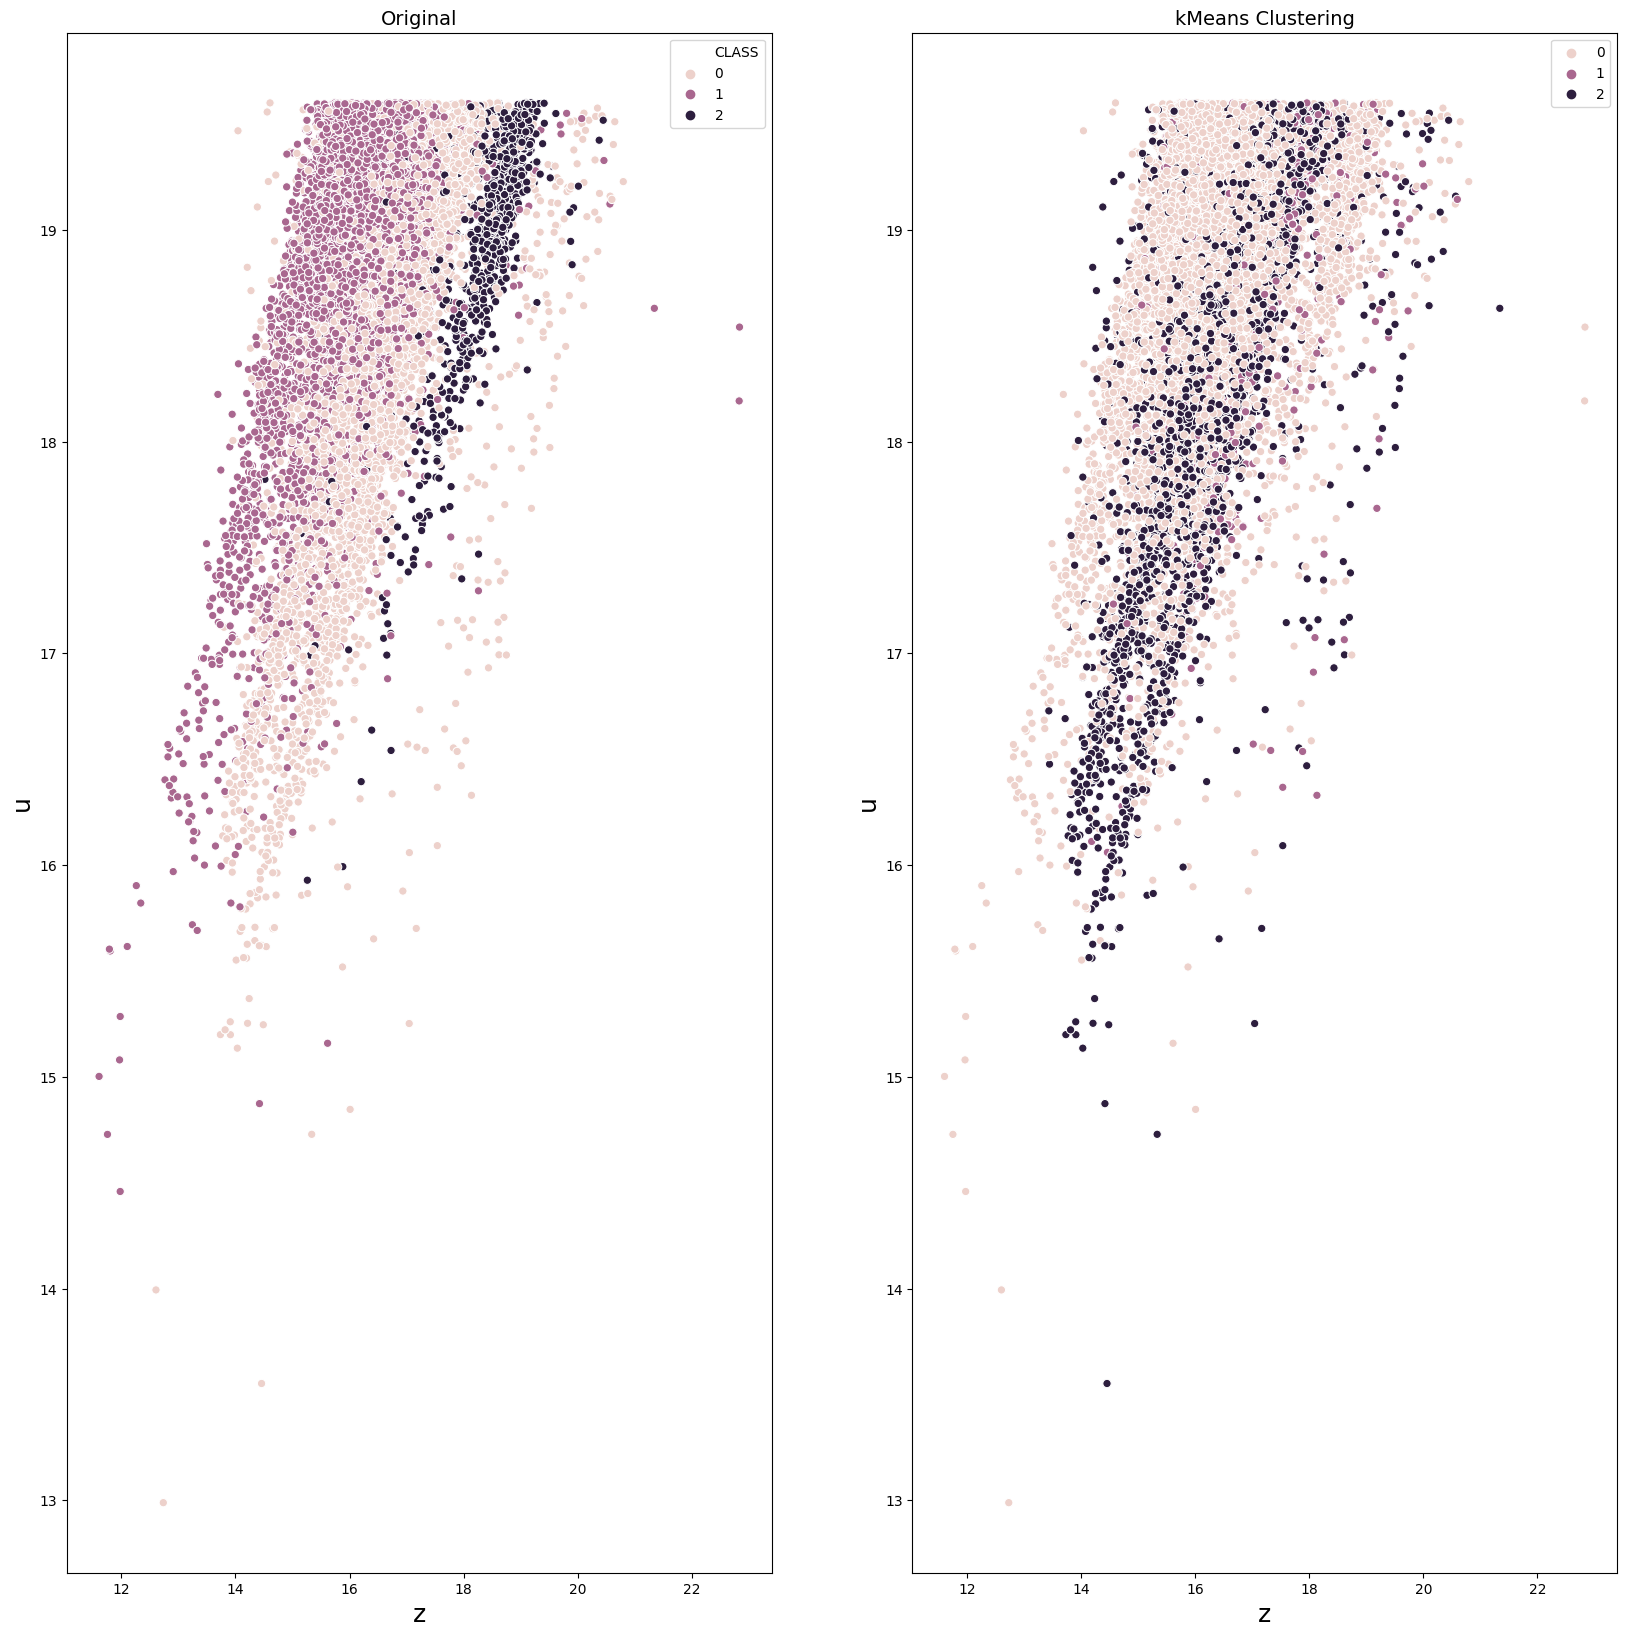

In [28]:
f,ax = plt.subplots(1,2,figsize=(20,20))

k = sns.scatterplot(X['z'], X["u"], hue = y, ax = ax[0])
k=sns.scatterplot(X['z'], X["u"], hue = Prediction1, ax = ax[1])

ax[0].set_title("Original",fontsize=14)
ax[1].set_title("kMeans Clustering", fontsize = 14)
ax[0].set_xlabel("z", fontsize=18)
ax[1].set_xlabel("z", fontsize=18)
ax[0].set_ylabel("u", fontsize=18)
ax[1].set_ylabel("u", fontsize=18)

plt.show()

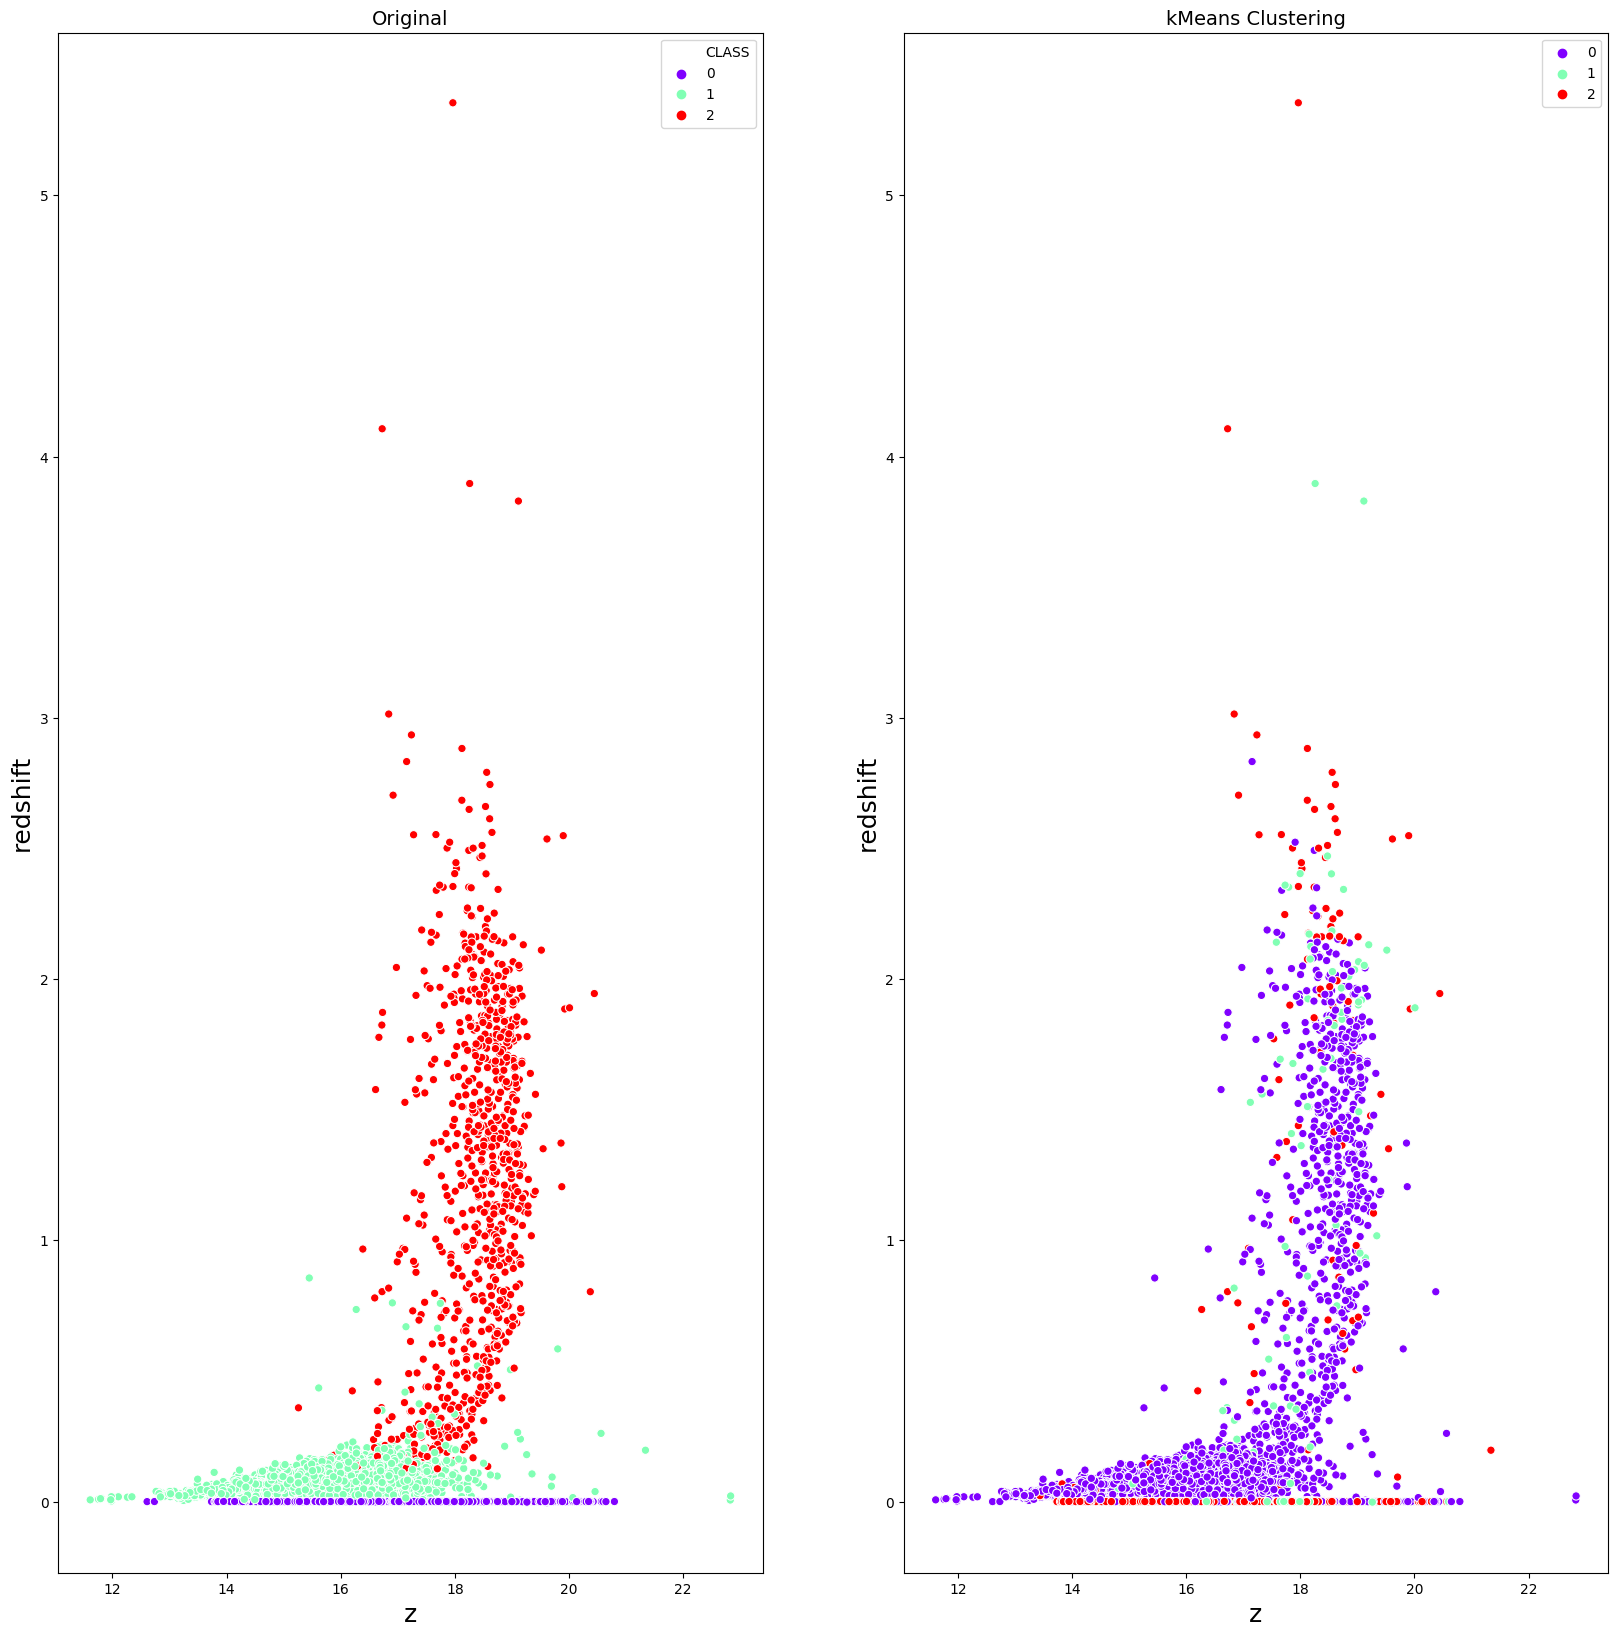

In [29]:
f,ax = plt.subplots(1,2,figsize=(20,20))

k = sns.scatterplot(X['z'], X["redshift"], hue = y, ax = ax[0], palette = "rainbow")
k=sns.scatterplot(X['z'], X["redshift"], hue = Prediction1, ax = ax[1], palette = "rainbow")

ax[0].set_title("Original",fontsize=14)
ax[1].set_title("kMeans Clustering", fontsize = 14)
ax[0].set_xlabel("z", fontsize=18)
ax[1].set_xlabel("z", fontsize=18)
ax[0].set_ylabel("redshift", fontsize=18)
ax[1].set_ylabel("redshift", fontsize=18)

plt.show()

In [30]:
from sklearn.mixture import GaussianMixture

clu2 = GaussianMixture(n_components = 3)
clu2.fit(X)

Prediction2 = clu2.predict(X)

In [31]:
silhouette_score(X, Prediction2)

0.5762740132214409

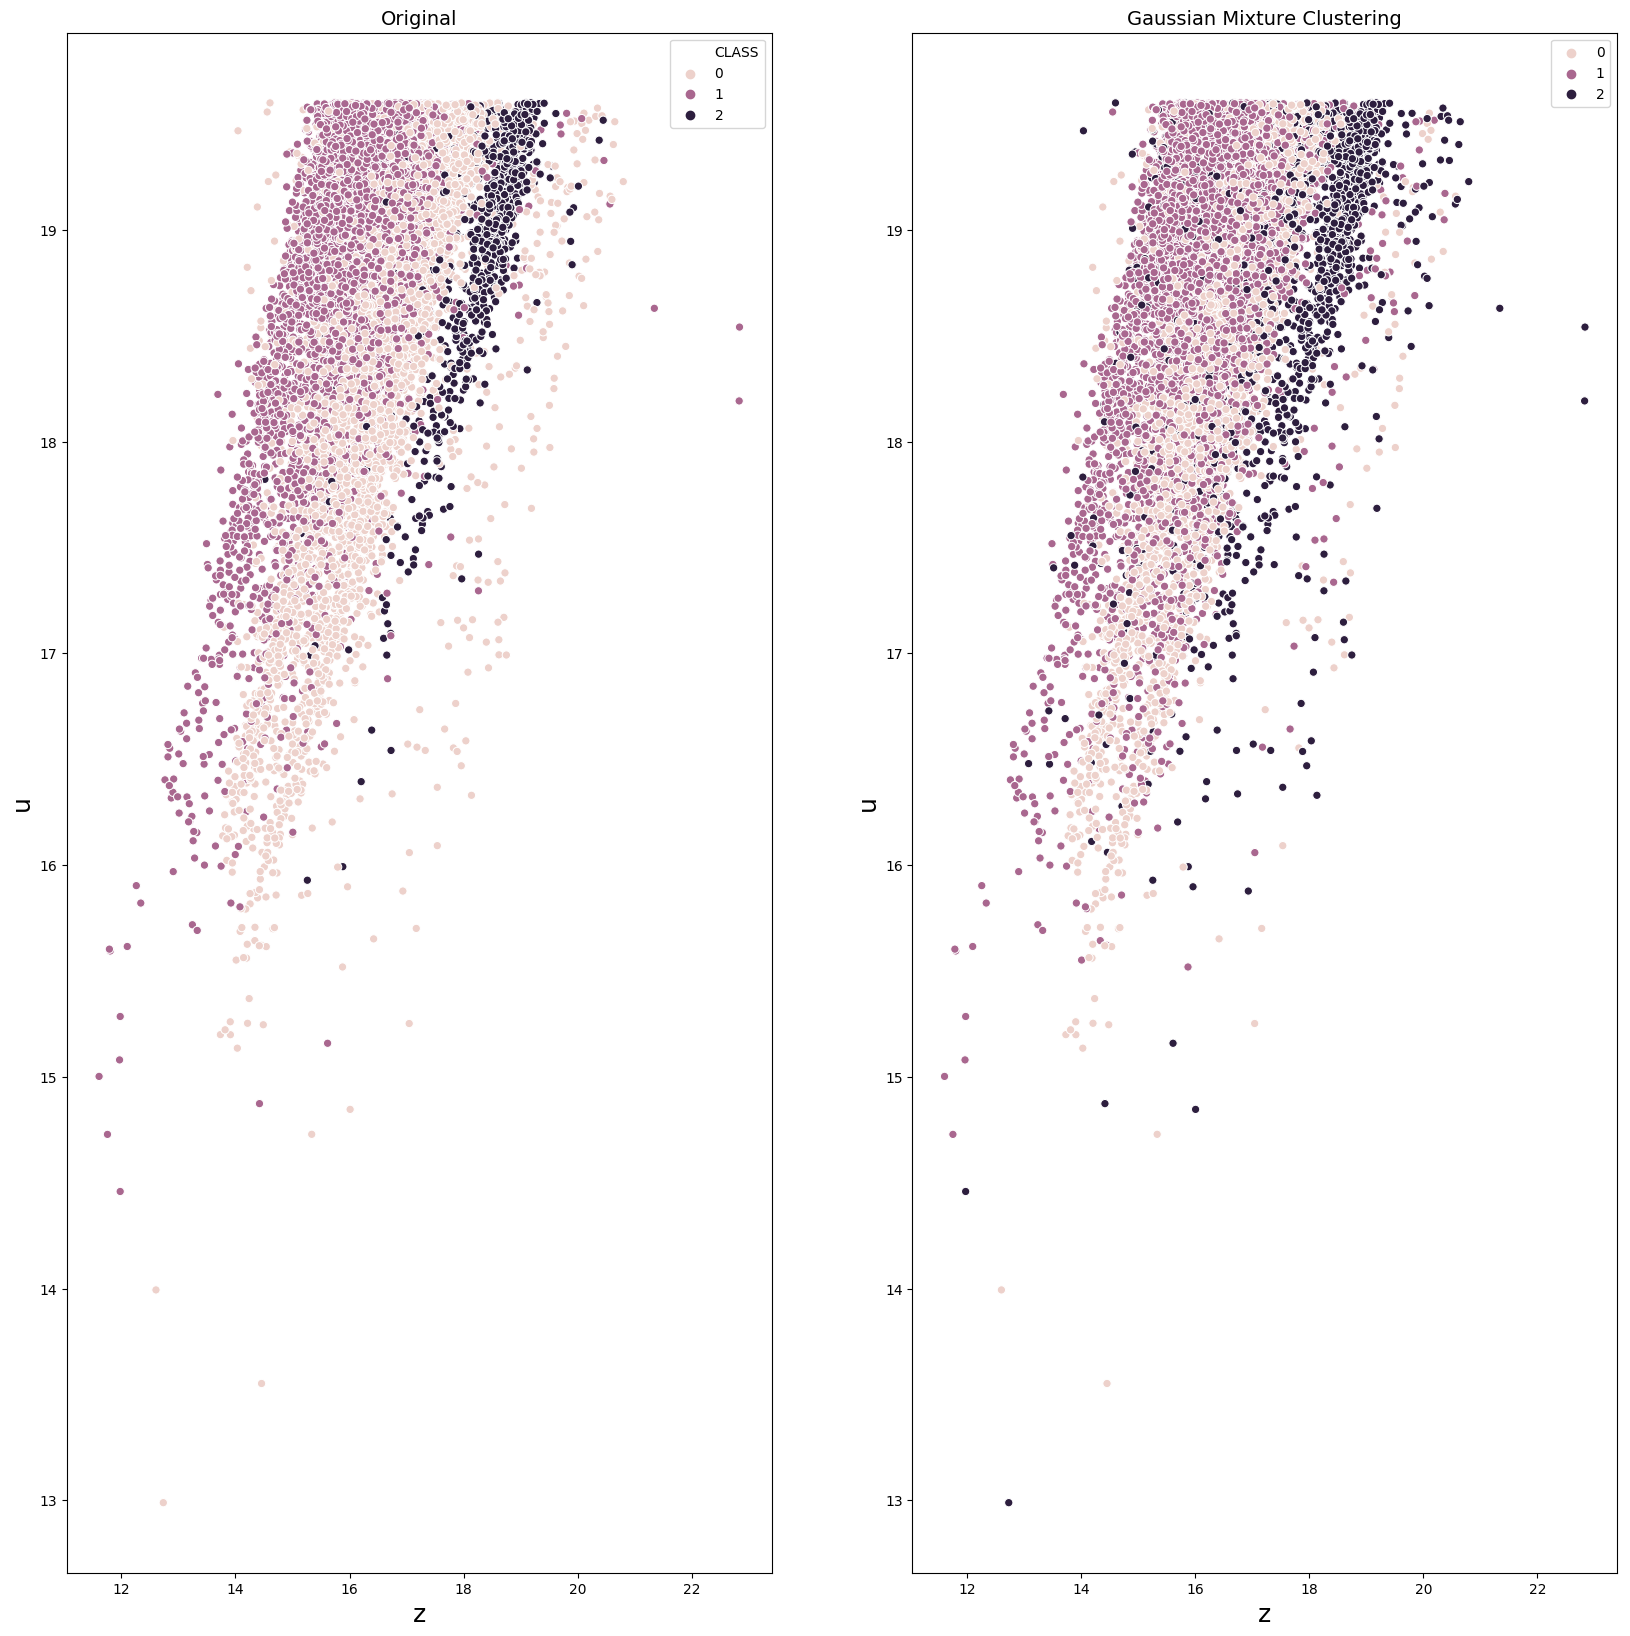

In [32]:
f,ax = plt.subplots(1,2,figsize=(20,20))

k = sns.scatterplot(X['z'], X["u"], hue = y, ax = ax[0])
k=sns.scatterplot(X['z'], X["u"], hue = Prediction2, ax = ax[1])

ax[0].set_title("Original",fontsize=14)
ax[1].set_title("Gaussian Mixture Clustering", fontsize = 14)
ax[0].set_xlabel("z", fontsize=18)
ax[1].set_xlabel("z", fontsize=18)
ax[0].set_ylabel("u", fontsize=18)
ax[1].set_ylabel("u", fontsize=18)

plt.show()

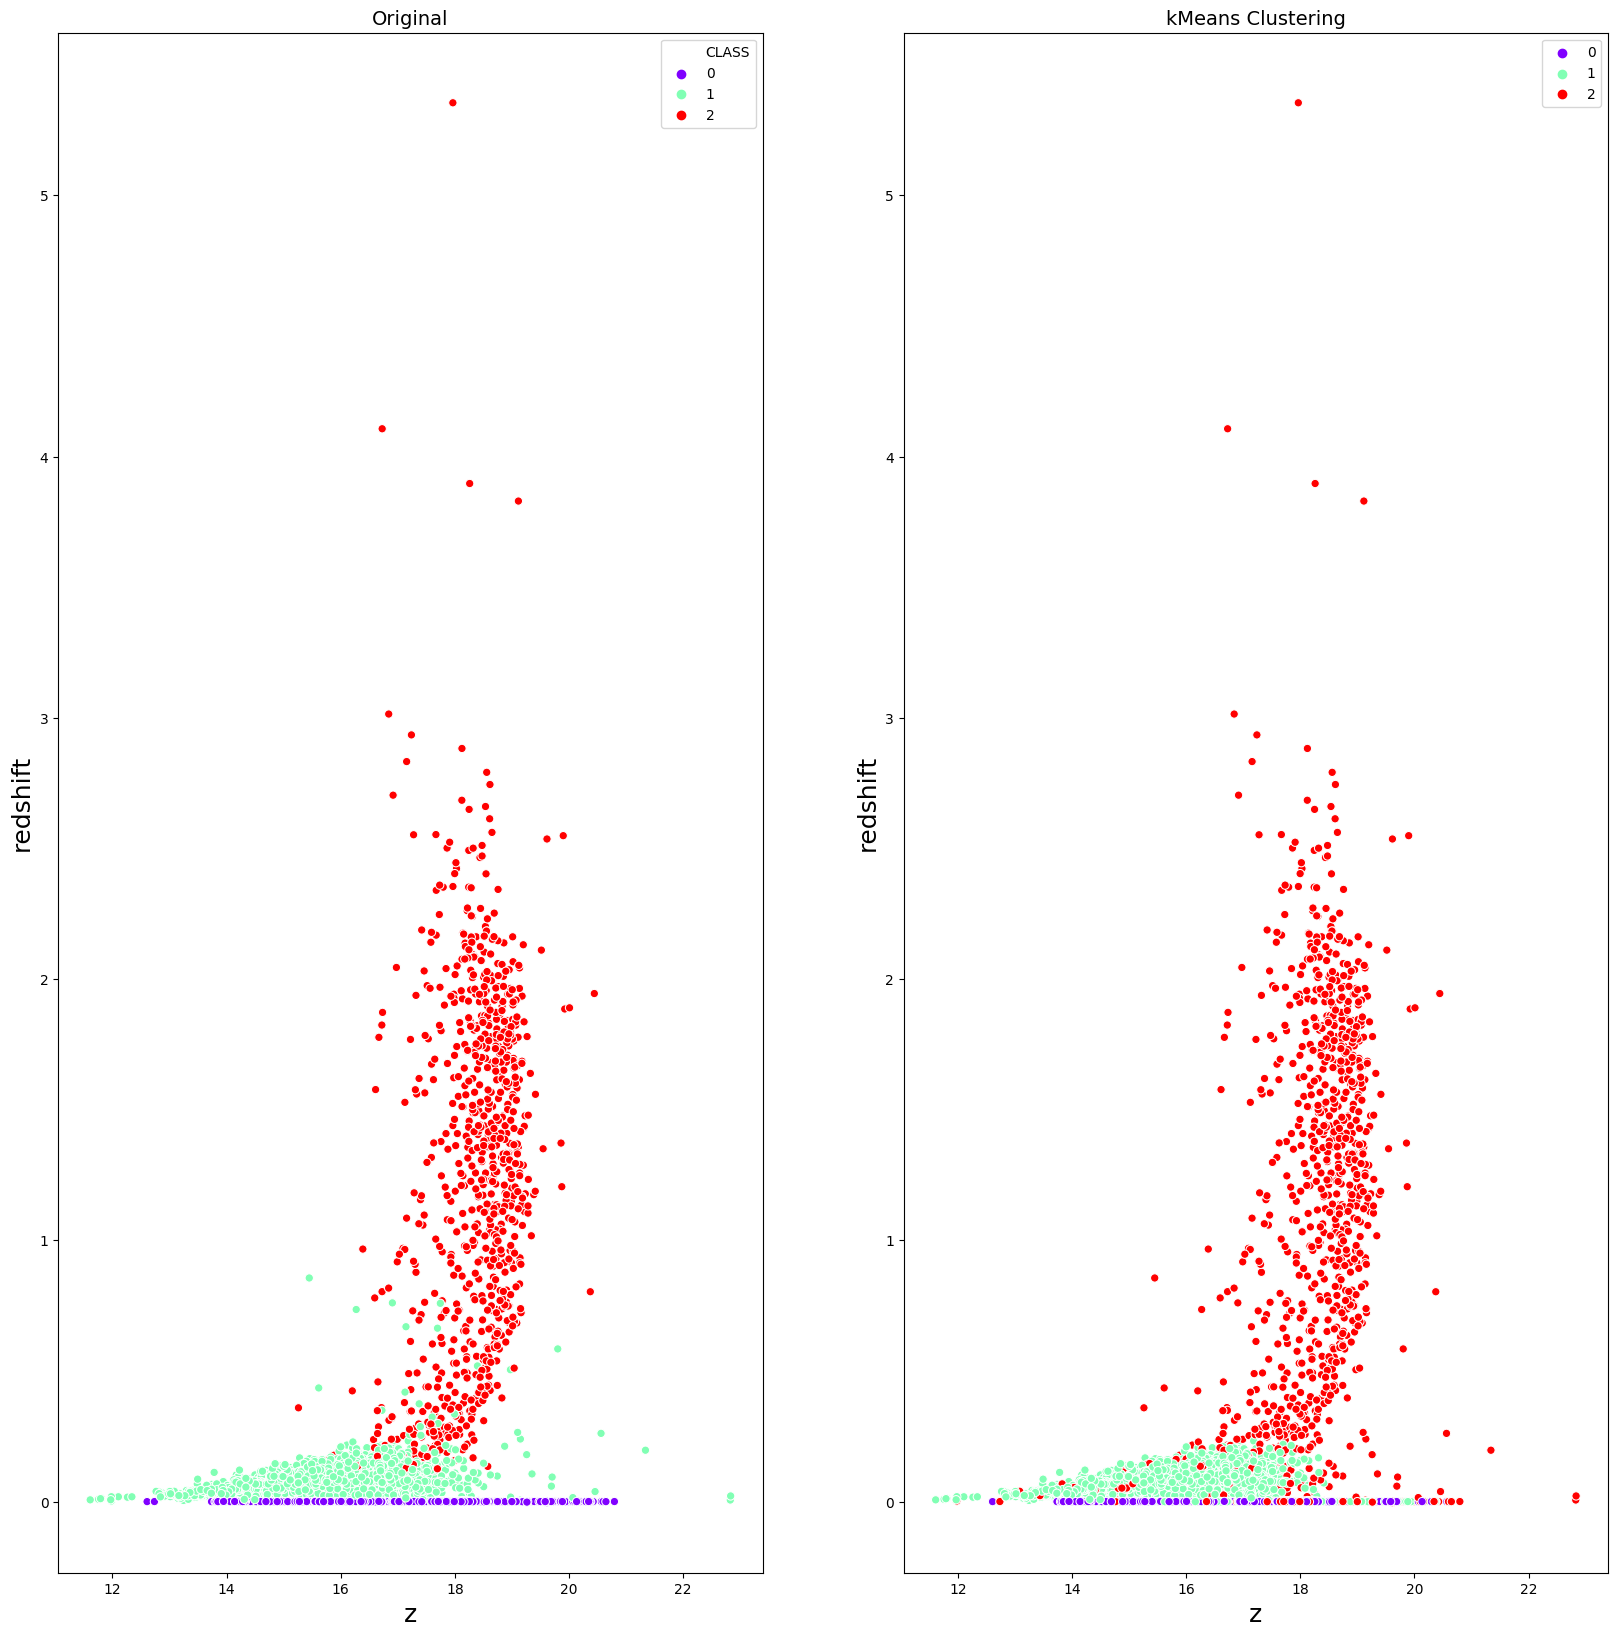

In [33]:
f,ax = plt.subplots(1,2,figsize=(20,20))

k = sns.scatterplot(X['z'], X["redshift"], hue = y, ax = ax[0], palette = "rainbow")
k=sns.scatterplot(X['z'], X["redshift"], hue = Prediction2, ax = ax[1], palette = "rainbow")

ax[0].set_title("Original",fontsize=14)
ax[1].set_title("kMeans Clustering", fontsize = 14)
ax[0].set_xlabel("z", fontsize=18)
ax[1].set_xlabel("z", fontsize=18)
ax[0].set_ylabel("redshift", fontsize=18)
ax[1].set_ylabel("redshift", fontsize=18)

plt.show()